In [1]:
import pypsa

# Path to your solved network
network_path = r"C:\Users\aleks\Documents\UsN\FM4017 - Project\FM4017-Project Repo Aleks\FM4017-Project\pypsa-eur\resources\NordicWeightedZonesTestDCLinksx\networks\base_s_70_elec_.nc"

# Load it
n = pypsa.Network(network_path)

# Check network info
print(n)


INFO:pypsa.network.io:Imported network 'Unnamed Network' has buses, carriers, generators, lines, links, loads, storage_units, stores


PyPSA Network 'Unnamed Network'


In [2]:
# Generators dispatch
print(n.generators_t.p)  # MW per snapshot

# Line flows
print(n.lines_t.p0)  # power flow per line

# Bus voltages
print(n.buses_t.v_mag_pu)  # per unit voltage


Empty DataFrame
Columns: []
Index: [2013-01-01 00:00:00, 2013-01-01 01:00:00, 2013-01-01 02:00:00, 2013-01-01 03:00:00, 2013-01-01 04:00:00, 2013-01-01 05:00:00, 2013-01-01 06:00:00, 2013-01-01 07:00:00, 2013-01-01 08:00:00, 2013-01-01 09:00:00, 2013-01-01 10:00:00, 2013-01-01 11:00:00, 2013-01-01 12:00:00, 2013-01-01 13:00:00, 2013-01-01 14:00:00, 2013-01-01 15:00:00, 2013-01-01 16:00:00, 2013-01-01 17:00:00, 2013-01-01 18:00:00, 2013-01-01 19:00:00, 2013-01-01 20:00:00, 2013-01-01 21:00:00, 2013-01-01 22:00:00, 2013-01-01 23:00:00]
Empty DataFrame
Columns: []
Index: [2013-01-01 00:00:00, 2013-01-01 01:00:00, 2013-01-01 02:00:00, 2013-01-01 03:00:00, 2013-01-01 04:00:00, 2013-01-01 05:00:00, 2013-01-01 06:00:00, 2013-01-01 07:00:00, 2013-01-01 08:00:00, 2013-01-01 09:00:00, 2013-01-01 10:00:00, 2013-01-01 11:00:00, 2013-01-01 12:00:00, 2013-01-01 13:00:00, 2013-01-01 14:00:00, 2013-01-01 15:00:00, 2013-01-01 16:00:00, 2013-01-01 17:00:00, 2013-01-01 18:00:00, 2013-01-01 19:00:00, 2013

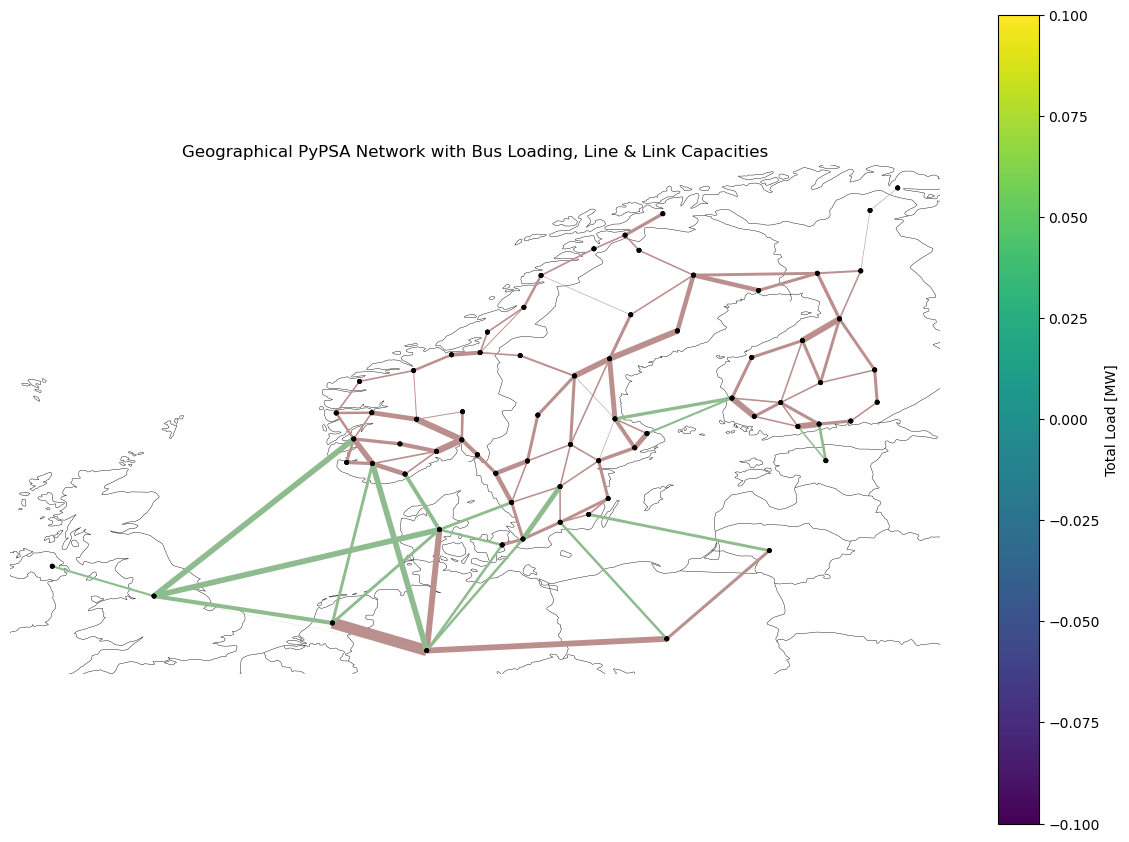

In [19]:
import pypsa
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Compute bus loading (sum over all time steps)
bus_loading = n.loads_t.p.sum(axis=0)  # MW per bus

# Extract line capacities
line_capacities = n.lines.s_nom.copy()
line_widths = 0.1 + 8 * line_capacities / line_capacities.max()

# Extract link capacities
if not n.links.empty:
    link_capacities = n.links.p_nom.copy()
    link_widths = 0.1 + 4 * link_capacities / link_capacities.max()
else:
    link_widths = None  # In case there are no links

# Create GeoAxes
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the network with buses, lines, and links
n.plot.map(ax=ax,
           bus_colors=bus_loading,
           bus_sizes=0.01,
           line_alpha=1,
           line_widths=line_widths,
           link_alpha=1,
           link_widths=link_widths)

# Add colorbar for bus loadings
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis,
                           norm=plt.Normalize(vmin=bus_loading.min(),
                                              vmax=bus_loading.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.7)
cbar.set_label("Total Load [MW]")

plt.title("Geographical PyPSA Network with Bus Loading, Line & Link Capacities")
plt.show()


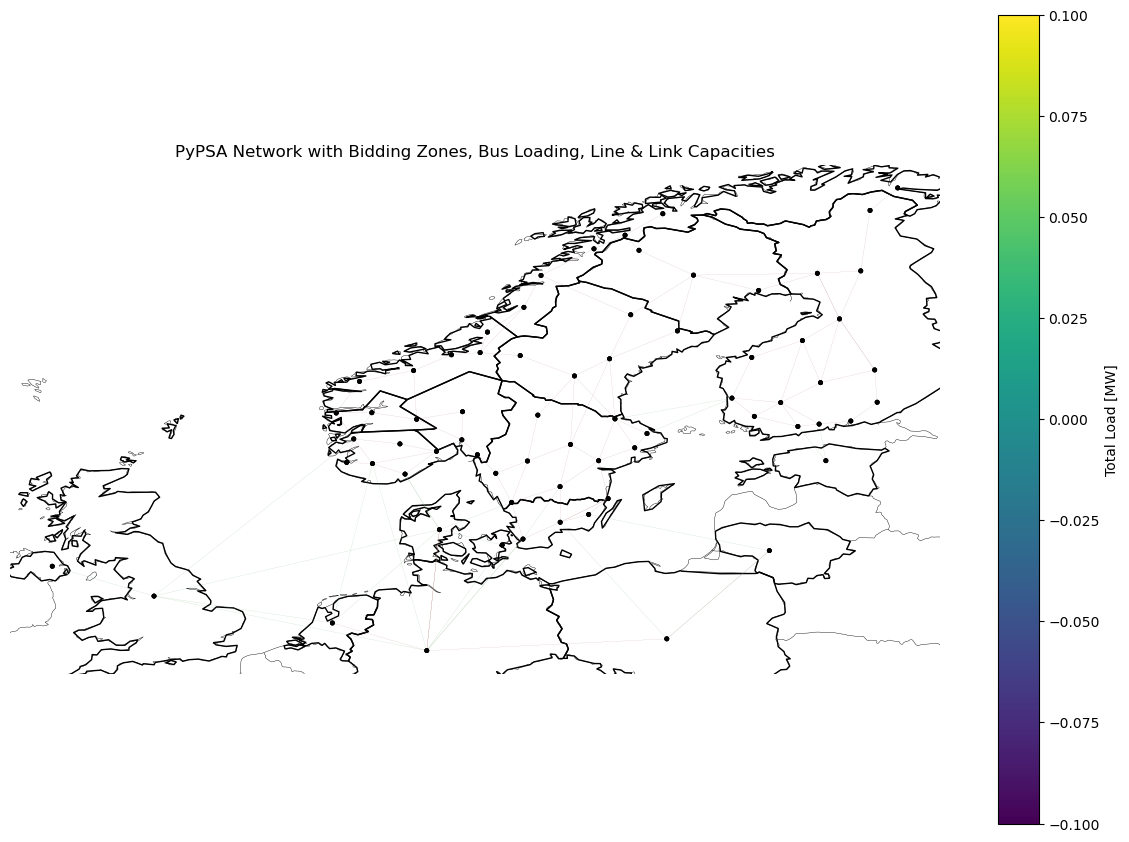

In [25]:
import pypsa
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
import numpy as np

# Load the bidding zones GeoJSON
zones_gdf = gpd.read_file(r"C:\Users\aleks\Documents\UsN\FM4017 - Project\FM4017-Project Repo Aleks\FM4017-Project\pypsa-eur\resources\NordicWeightedZonesTestDCLinksx\bidding_zones.geojson")

# Compute bus loading (sum over all time steps)
bus_loading = n.loads_t.p.sum(axis=0)  # MW per bus

# Extract line capacities
line_capacities = n.lines.s_nom.copy()
line_widths = 0.1 #+ 8 * line_capacities / line_capacities.max()

# Extract link capacities
if not n.links.empty:
    link_capacities = n.links.p_nom.copy()
    link_widths = 0.1 #+ 4 * link_capacities / link_capacities.max()
else:
    link_widths = None

# Create GeoAxes
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree())

# --- Plot bidding zones (as polygons) ---
zones_gdf.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=1)

# If you want filled colors per zone:
#zones_gdf.plot(ax=ax, column="name", legend=True, alpha=0.3)

# --- Plot the network ---
n.plot.map(ax=ax,
           bus_colors=bus_loading,
           bus_sizes=0.01,
           line_alpha=1,
           line_widths=line_widths,
           link_alpha=1,
           link_widths=link_widths)

# Add colorbar for bus loadings
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis,
                           norm=plt.Normalize(vmin=bus_loading.min(),
                                              vmax=bus_loading.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.7)
cbar.set_label("Total Load [MW]")

plt.title("PyPSA Network with Bidding Zones, Bus Loading, Line & Link Capacities")
plt.show()


In [29]:
import geopandas as gpd
from shapely.geometry import Point

# Load the bidding zones polygons
zones_gdf = gpd.read_file(r"C:\Users\aleks\Documents\UsN\FM4017 - Project\FM4017-Project Repo Aleks\FM4017-Project\pypsa-eur\resources\NordicWeightedZonesTestDCLinksx\bidding_zones.geojson")

# Convert buses to GeoDataFrame with Point geometry
bus_gdf = gpd.GeoDataFrame(
    n.buses.copy(),
    geometry=gpd.points_from_xy(n.buses.x, n.buses.y),
    crs=zones_gdf.crs
)

# Spatial join: assign each bus the zone it falls into
bus_with_zone = gpd.sjoin(bus_gdf, zones_gdf, how="left", predicate="within")

# Add zone info back to the network (use 'zone_name' from the geojson)
n.buses["zone"] = bus_with_zone["zone_name"]




In [33]:
print(n.buses.head(70))

          v_nom type          x          y carrier unit location  \
Bus                                                                
DE0 0     380.0        9.207010  51.177778      AC                 
DK0 0     380.0        9.727929  56.142471      AC                 
DK1 0     380.0       12.303316  55.515974      AC                 
EE2 0     380.0       25.591409  58.974010      AC                 
FI1 0     380.0       22.655183  60.793823      AC                 
FI1 1     380.0       25.373036  62.177042      AC                 
FI1 10    380.0       24.628585  63.904473      AC                 
FI1 11    380.0       23.736906  61.359577      AC                 
FI1 12    380.0       27.023191  66.766035      AC                 
FI1 13    380.0       27.405162  69.249510      AC                 
FI1 14    380.0       25.314144  60.477254      AC                 
FI1 2     380.0       25.242799  66.666868      AC                 
FI1 3     380.0       26.615026  60.602861      

In [34]:
norway_zone_map = {
    "NOS1": "NO1",
    "NOS2": "NO2",
    "NOS5": "NO5",
    "NOM1": "NO3",
    "NON1": "NO4"
}





In [35]:
# First assign subzones from the geojson
n.buses["subzone"] = bus_with_zone["zone_name"]

# Then map to bidding zones
n.buses["zone"] = n.buses["subzone"].map(norway_zone_map).fillna(n.buses["subzone"])


In [36]:
print(n.buses.head(70))

          v_nom type          x          y carrier unit location  \
Bus                                                                
DE0 0     380.0        9.207010  51.177778      AC                 
DK0 0     380.0        9.727929  56.142471      AC                 
DK1 0     380.0       12.303316  55.515974      AC                 
EE2 0     380.0       25.591409  58.974010      AC                 
FI1 0     380.0       22.655183  60.793823      AC                 
FI1 1     380.0       25.373036  62.177042      AC                 
FI1 10    380.0       24.628585  63.904473      AC                 
FI1 11    380.0       23.736906  61.359577      AC                 
FI1 12    380.0       27.023191  66.766035      AC                 
FI1 13    380.0       27.405162  69.249510      AC                 
FI1 14    380.0       25.314144  60.477254      AC                 
FI1 2     380.0       25.242799  66.666868      AC                 
FI1 3     380.0       26.615026  60.602861      

In [47]:
n.generators['carrier'].unique()



array(['CCGT', 'OCGT', 'biomass', 'coal', 'lignite', 'oil', 'nuclear',
       'onwind', 'offwind-dc', 'solar-hsat', 'offwind-float',
       'offwind-ac', 'solar', 'ror'], dtype=object)

In [48]:

n.generators

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,e_sum_min,e_sum_max,q_set,sign,carrier,marginal_cost,marginal_cost_quadratic,active,build_year,lifetime,capital_cost,efficiency,committable,start_up_cost,shut_down_cost,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DE0 0 CCGT,DE0 0,PQ,,27588.683094,0.0,True,27588.683094,inf,0.0,1.000,0.0,-inf,inf,0.0,1.0,CCGT,50.856734,0.0,True,0,inf,274.408214,0.540198,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.000000,0.0
DE0 0 OCGT,DE0 0,PQ,,23.310000,0.0,True,23.310000,inf,0.0,1.000,0.0,-inf,inf,0.0,1.0,OCGT,58.314663,0.0,True,0,inf,123.979495,0.458763,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.000000,0.0
DE0 0 biomass,DE0 0,PQ,,2299.507379,0.0,False,2299.507379,inf,0.0,1.000,0.0,-inf,inf,0.0,1.0,biomass,16.614361,0.0,True,0,inf,806.030277,0.449124,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.000000,0.0
DE0 0 coal,DE0 0,PQ,,18098.577228,0.0,False,18098.577228,inf,0.0,1.000,0.0,-inf,inf,0.0,1.0,coal,30.116182,0.0,True,0,inf,923.857609,0.355816,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.000000,0.0
DE0 0 lignite,DE0 0,PQ,,21701.743000,0.0,False,21701.743000,inf,0.0,1.000,0.0,-inf,inf,0.0,1.0,lignite,12.114074,0.0,True,0,inf,923.857609,0.376001,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.000000,0.0
DE0 0 oil,DE0 0,PQ,,2663.107710,0.0,False,2663.107710,inf,0.0,1.000,0.0,-inf,inf,0.0,1.0,oil,155.238677,0.0,True,0,inf,107.063782,0.355719,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.000000,0.0
DK0 0 CCGT,DK0 0,PQ,,775.200000,0.0,True,775.200000,inf,0.0,1.000,0.0,-inf,inf,0.0,1.0,CCGT,49.827795,0.0,True,0,inf,274.408214,0.544376,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.000000,0.0
DK0 0 biomass,DK0 0,PQ,,72.000000,0.0,False,72.000000,inf,0.0,1.000,0.0,-inf,inf,0.0,1.0,biomass,15.828205,0.0,True,0,inf,806.030277,0.468000,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.000000,0.0
DK0 0 coal,DK0 0,PQ,,1817.885609,0.0,False,1817.885609,inf,0.0,1.000,0.0,-inf,inf,0.0,1.0,coal,30.098840,0.0,True,0,inf,923.857609,0.356000,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.000000,0.0


False

,bus0,bus1,type,carrier,efficiency,active,build_year,lifetime,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_set,p_min_pu,p_max_pu,capital_cost,marginal_cost,marginal_cost_quadratic,stand_by_cost,length,terrain_factor,committable,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt,voltage,underground,under_construction,tags,geometry,dc,underwater_fraction,project_status
Link,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
relation/16213216-525-DC,DE0 0,NO1 17,,DC,1.000000,True,0,inf,1400.0,0.0,True,1400.0,31400.0,0.0,-1.0,1.0,213.428818,0.0,0.0,0.0,865.295415,1.0,False,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0,525.0,1.0,0.0,relation/16213216,LINESTRING (6.7544309946114405 58.669060406684...,1.0,0.802530,
relation/2505320-400-DC,DK1 0,DE0 0,,DC,1.000000,True,0,inf,600.0,0.0,True,600.0,30600.0,0.0,-1.0,1.0,118.489462,0.0,0.0,0.0,524.216649,1.0,False,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0,400.0,1.0,0.0,relation/2505320,LINESTRING (12.0074143643741 55.45030397887522...,1.0,0.281105,
relation/3391931-350-DC,DK0 0,NO1 13,,DC,1.000000,True,0,inf,940.0,0.0,True,940.0,30940.0,0.0,-1.0,1.0,87.702983,0.0,0.0,0.0,267.517797,1.0,False,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0,350.0,1.0,0.0,relation/3391931,LINESTRING (7.900400664968465 58.2597498120886...,1.0,0.505184,
relation/3391954-500-DC,FI1 9,SE1 0,,DC,1.000000,True,0,inf,800.0,0.0,True,800.0,30800.0,0.0,-1.0,1.0,93.193654,0.0,0.0,0.0,274.710482,1.0,False,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0,500.0,1.0,0.0,relation/3391954,LINESTRING (17.063499290470876 60.425539004588...,1.0,0.658712,
relation/3392010-450-DC,PL0 0,SE1 11,,DC,1.000000,True,0,inf,600.0,0.0,True,600.0,30600.0,0.0,-1.0,1.0,170.454344,0.0,0.0,0.0,603.729202,1.0,False,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0,450.0,1.0,0.0,relation/3392010,LINESTRING (14.84028235523815 56.1530147407003...,1.0,0.940780,
relation/3918230-450-DC,DE0 0,SE1 17,,DC,1.000000,True,0,inf,600.0,0.0,True,600.0,30600.0,0.0,-1.0,1.0,163.042926,0.0,0.0,0.0,572.166011,1.0,False,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0,450.0,1.0,0.0,relation/3918230,LINESTRING (10.80243095002194 53.8961375941516...,1.0,0.927793,
relation/5487095-400-DC,DK0 0,DK1 0,,DC,1.000000,True,0,inf,600.0,0.0,True,600.0,30600.0,0.0,-1.0,1.0,73.324597,0.0,0.0,0.0,175.267024,1.0,False,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0,400.0,1.0,0.0,relation/5487095,LINESTRING (10.505724427906852 55.365970143543...,1.0,0.560249,
relation/6886400-450-DC,EE2 0,FI1 14,,DC,1.000000,True,0,inf,650.0,0.0,True,650.0,30650.0,0.0,-1.0,1.0,76.895682,0.0,0.0,0.0,167.873790,1.0,False,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0,450.0,1.0,0.0,relation/6886400,LINESTRING (25.367309680105414 60.377636227284...,1.0,0.843705,
relation/8184629-300-DC,DK0 0,SE1 4,,DC,1.000000,True,0,inf,680.0,0.0,True,680.0,30680.0,0.0,-1.0,1.0,80.145866,0.0,0.0,0.0,219.495889,1.0,False,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0,300.0,1.0,0.0,relation/8184629,LINESTRING (10.08956852783998 57.0628444868751...,1.0,0.524835,
